# Lab | Pandas

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

The data includes information such as customer ID, state, gender, education, income, and other variables that can be used to perform various analyses.

Throughout the lab, we will be using the pandas library in Python to manipulate and analyze the data. Pandas is a powerful library that provides various data manipulation and analysis tools, including the ability to load and manipulate data from a variety of sources, including CSV files.

### Data Description

- Customer - Customer ID

- ST - State where customers live

- Gender - Gender of the customer

- Education - Background education of customers 

- Customer Lifetime Value - Customer lifetime value(CLV) is the total revenue the client will derive from their entire relationship with a customer. In other words, is the predicted or calculated value of a customer over their entire duration as a policyholder with the insurance company. It is an estimation of the net profit that the insurance company expects to generate from a customer throughout their relationship with the company. Customer Lifetime Value takes into account factors such as the duration of the customer's policy, premium payments, claim history, renewal likelihood, and potential additional services or products the customer may purchase. It helps insurers assess the long-term profitability and value associated with retaining a particular customer.

- Income - Customers income

- Monthly Premium Auto - Amount of money the customer pays on a monthly basis as a premium for their auto insurance coverage. It represents the recurring cost that the insured person must pay to maintain their insurance policy and receive coverage for potential damages, accidents, or other covered events related to their vehicle.

- Number of Open Complaints - Number of complaints the customer opened

- Policy Type - There are three type of policies in car insurance (Corporate Auto, Personal Auto, and Special Auto)

- Vehicle Class - Type of vehicle classes that customers have Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car

- Total Claim Amount - the sum of all claims made by the customer. It represents the total monetary value of all approved claims for incidents such as accidents, theft, vandalism, or other covered events.


External Resources: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

## Challenge 1: Understanding the data

In this challenge, you will use pandas to explore a given dataset. Your task is to gain a deep understanding of the data by analyzing its characteristics, dimensions, and statistical properties.

- Identify the dimensions of the dataset by determining the number of rows and columns it contains.
- Determine the data types of each column and evaluate whether they are appropriate for the nature of the variable. You should also provide suggestions for fixing any incorrect data types.
- Identify the number of unique values for each column and determine which columns appear to be categorical. You should also describe the unique values of each categorical column and the range of values for numerical columns, and give your insights.
- Compute summary statistics such as mean, median, mode, standard deviation, and quartiles to understand the central tendency and distribution of the data for numerical columns. You should also provide your conclusions based on these summary statistics.
- Compute summary statistics for categorical columns and providing your conclusions based on these statistics.

In [2]:
#Your code here
#Identify the dimensions of the dataset by determining the number of rows and columns it contains.
import pandas as pd
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
df = pd.read_csv(url)
dfshape = print(f"the data frame has {df.shape[0]} rows and {df.shape[1]} columns.")
print(dfshape)

the data frame has 4008 rows and 11 columns.
None


In [3]:
#1.2. Determine the data types of each column and evaluate whether they are appropriate for the nature of the variable. 
#You should also provide suggestions for fixing any incorrect data types.

df.info()
df.describe(include="object")

#Customer Lifetime Value should be a float. The numbers don't make sense either as percentages (too large)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   1071 non-null   object 
 1   ST                         1071 non-null   object 
 2   GENDER                     954 non-null    object 
 3   Education                  1071 non-null   object 
 4   Customer Lifetime Value    1068 non-null   object 
 5   Income                     1071 non-null   float64
 6   Monthly Premium Auto       1071 non-null   float64
 7   Number of Open Complaints  1071 non-null   object 
 8   Policy Type                1071 non-null   object 
 9   Vehicle Class              1071 non-null   object 
 10  Total Claim Amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 344.6+ KB


,Customer,ST,GENDER,Education,Customer Lifetime Value,Number of Open Complaints,Policy Type,Vehicle Class
count,1071,1071,954,1071,1068,1071,1071,1071
unique,1071,8,5,6,1027,6,3,6
top,RB50392,Oregon,F,Bachelor,445811.34%,1/0/00,Personal Auto,Four-Door Car
freq,1,320,457,324,4,830,780,576


In [4]:
df.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [5]:
"""1.3. Identify the number of unique values for each column and determine which columns appear to be categorical. 
You should also describe the unique values of each categorical column and the range of values for numerical columns, 
and give your insights."""
df.nunique()

for column in df:
    print(f"Number of unique values in {column}: {df[column].nunique()}")

#Categorical variables:
    #ST, GENDER, Education, Policy Type, Vehicle Class

Number of unique values in Customer: 1071
Number of unique values in ST: 8
Number of unique values in GENDER: 5
Number of unique values in Education: 6
Number of unique values in Customer Lifetime Value: 1027
Number of unique values in Income: 774
Number of unique values in Monthly Premium Auto: 132
Number of unique values in Number of Open Complaints: 6
Number of unique values in Policy Type: 3
Number of unique values in Vehicle Class: 6
Number of unique values in Total Claim Amount: 761


In [6]:
"""1.4. Compute summary statistics such as mean, median, mode, standard deviation, and quartiles to understand the central 
tendency and distribution of the data for numerical columns. You should also provide your conclusions based on 
these summary statistics."""

df.describe()

#Income: customers have on average an income of 39,295 and a median of 36,234. The distribution is left-skewed
#Monthly Premium Auto: customers pay on average 193 per month for their premium. The median value is 83, hence the 
#distribution is right-skewed.
#Total Claim Amount: on average the amount of the claims is of 404. 75% of customers have claim up to 532 dollars."""

,Income,Monthly Premium Auto,Total Claim Amount
count,1071.000000,1071.000000,1071.000000
mean,39295.701214,193.234360,404.986909
std,30469.427060,1601.190369,293.027260
min,0.000000,61.000000,0.382107
25%,14072.000000,68.000000,202.157702
50%,36234.000000,83.000000,354.729129
75%,64631.000000,109.500000,532.800000
max,99960.000000,35354.000000,2893.239678


In [7]:
"""1.5. Compute summary statistics for categorical columns and providing your conclusions based on these statistics."""
df.describe(include='object')



,Customer,ST,GENDER,Education,Customer Lifetime Value,Number of Open Complaints,Policy Type,Vehicle Class
count,1071,1071,954,1071,1068,1071,1071,1071
unique,1071,8,5,6,1027,6,3,6
top,RB50392,Oregon,F,Bachelor,445811.34%,1/0/00,Personal Auto,Four-Door Car
freq,1,320,457,324,4,830,780,576


In [8]:
categorical_list = ["ST","GENDER","Education","Policy Type","Vehicle Class"]

for column in df.columns:
    if column in categorical_list:
        print(f"{column} is a column with categorical values.")

ST is a column with categorical values.
GENDER is a column with categorical values.
Education is a column with categorical values.
Policy Type is a column with categorical values.
Vehicle Class is a column with categorical values.


In [9]:
for column in df.columns:
    if column in categorical_list:
        print(df[column].value_counts()) #count of unique values in each column
        print("")
        print(df[column].value_counts(normalize=True) * 100) #unique values as percentages
        print("")
        print("")
        


ST
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64

ST
Oregon        29.878618
California    19.701214
Arizona       17.366947
Cali          11.204482
Nevada         9.150327
Washington     7.563025
WA             2.801120
AZ             2.334267
Name: proportion, dtype: float64


GENDER
F         457
M         413
Male       39
female     28
Femal      17
Name: count, dtype: int64

GENDER
F         47.903564
M         43.291405
Male       4.088050
female     2.935010
Femal      1.781971
Name: proportion, dtype: float64


Education
Bachelor                324
College                 313
High School or Below    296
Master                   94
Doctor                   37
Bachelors                 7
Name: count, dtype: int64

Education
Bachelor                30.252101
College                 29.225023
High School or Below    27.637722
Master                   8.776844

In [10]:
#pip install matplotlib

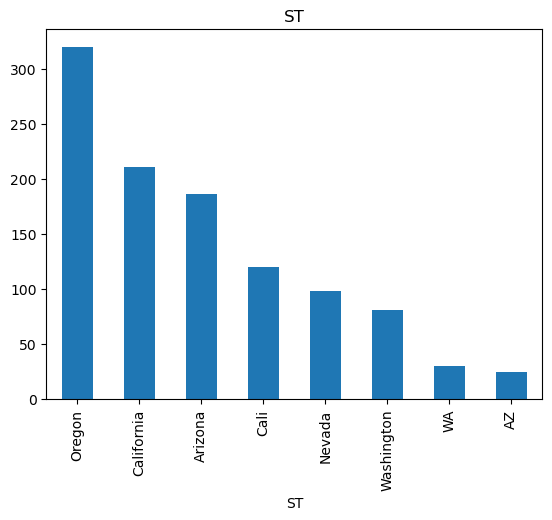

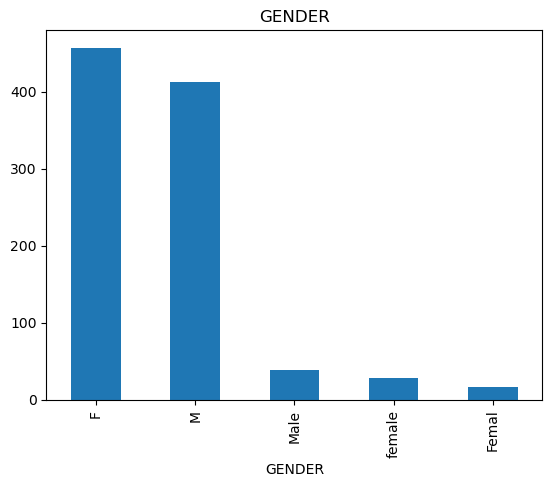

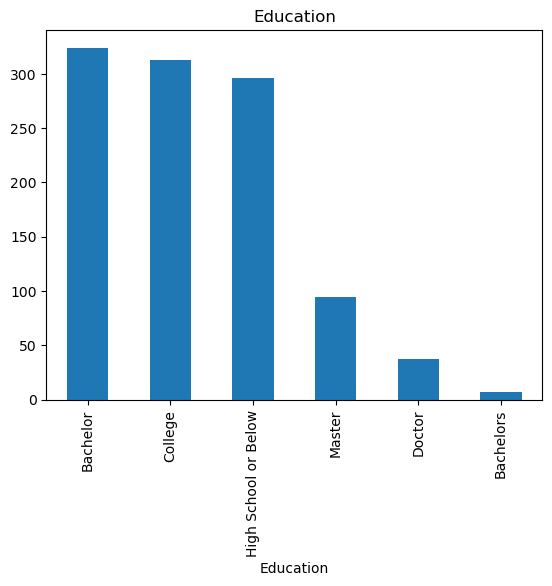

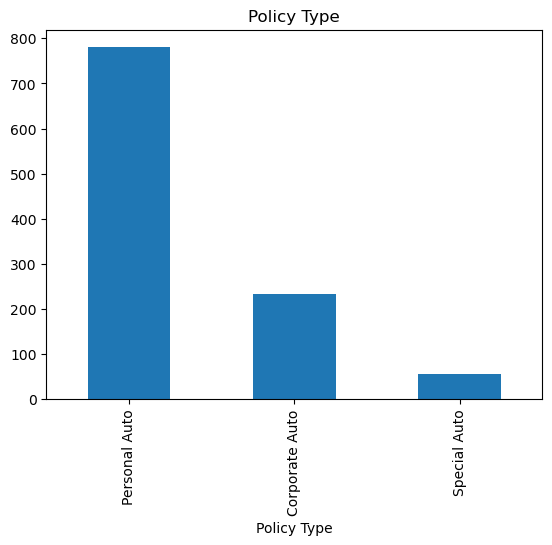

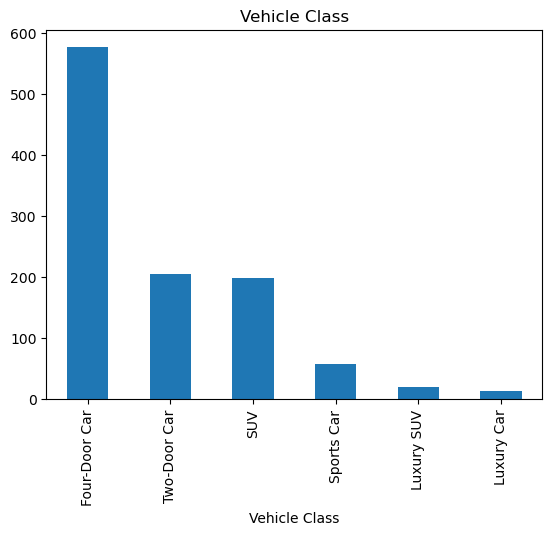

In [11]:
import matplotlib.pyplot as plt

for column in df.columns:
    if column in categorical_list:
        df[column].value_counts().plot(kind='bar', title=column)
        plt.show()

## Challenge 2: analyzing the data

### Exercise 1

The marketing team wants to know the top 5 less common customer locations. Create a pandas Series object that contains the customer locations and their frequencies, and then retrieve the top 5 less common locations in ascending order.

In [12]:
# Your code here
location_series = pd.read_csv(url, usecols=["ST"]).squeeze("columns")

In [13]:
print(location_series.value_counts())
print(location_series.value_counts(normalize=True) * 100)

ST
Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: count, dtype: int64
ST
Oregon        29.878618
California    19.701214
Arizona       17.366947
Cali          11.204482
Nevada         9.150327
Washington     7.563025
WA             2.801120
AZ             2.334267
Name: proportion, dtype: float64


In [14]:
#2.1. retrieve the top 5 less common locations in ascending order:
location_series2 = location_series.value_counts(normalize=True)*100
location_series2.nsmallest(5)

ST
AZ             2.334267
WA             2.801120
Washington     7.563025
Nevada         9.150327
Cali          11.204482
Name: proportion, dtype: float64

### Exercise 2

The sales team wants to know the total number of policies sold for each type of policy. Create a pandas Series object that contains the policy types and their total number of policies sold, and then retrieve the policy type with the highest number of policies sold.

*Hint:*
- *Using value_counts() method simplifies this analysis.*
- *Futhermore, there is a method that returns the index of the maximum value in a column or row.*


In [15]:
# 2.2.1. Your code here
policy_type = pd.read_csv(url, usecols=["Policy Type"]).squeeze("columns")
policy_total = policy_type.value_counts()
policy_total

Policy Type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64

In [16]:
# 2.2.2. retrieve the policy type with the highest number of policies sold.
print(f"{policy_total.idxmax()} has the highest number of policies sold ({policy_total.max()} policies sold).")

Personal Auto has the highest number of policies sold (780 policies sold).


### Exercise 3

The sales team wants to know if customers with Personal Auto have a lower income than those with Corporate Auto. How does the average income compare between the two policy types?

- Use *loc* to create two dataframes: one containing only Personal Auto policies and one containing only Corporate Auto policies.
- Calculate the average income for each policy.
- Print the results.

In [17]:
# 3.1. Your code here
#Use *loc* to create two dataframes: one containing only Personal Auto policies
#- Calculate the average income for each policy.
#- Print the results.

personal_auto_df = df.loc[df["Policy Type"]=="Personal Auto"]
personal_auto_df.describe()
print(f"The mean of income for Personal Auto customers is {round(personal_auto_df['Income'].mean())}.")


The mean of income for Personal Auto customers is 38181.


In [18]:
#3.2. Use *loc* to create two dataframes: one containing only Corporate Auto policies.
#- Calculate the average income for each policy.
#- Print the results.
corporate_auto_df = df.loc[df["Policy Type"]=="Corporate Auto"]
corporate_auto_df.describe()
print(f"The mean of income for Corporate Auto customers is {round(corporate_auto_df['Income'].mean())}.")

The mean of income for Corporate Auto customers is 41390.


### Bonus: Exercise 4


Your goal is to identify customers with a high policy claim amount.

Instructions:

- Review again the statistics for total claim amount to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount data. 

*Note: When analyzing data, we often want to focus on certain groups of values to gain insights. Percentiles are a useful tool to help us define these groups. A percentile is a measure that tells us what percentage of values in a dataset are below a certain value. For example, the 75th percentile represents the value below which 75% of the data falls. Similarly, the 25th percentile represents the value below which 25% of the data falls. When we talk about the top 25%, we are referring to the values that fall above the 75th percentile, which represent the top quarter of the data. On the other hand, when we talk about the bottom 25%, we are referring to the values that fall below the 25th percentile, which represent the bottom quarter of the data. By focusing on these groups, we can identify patterns and trends that may be useful for making decisions and taking action.*

*Hint: look for a method that gives you the percentile or quantile 0.75 and 0.25 for a Pandas Series.*

*Hint 2: check `Boolean selection according to the values of a single column` in https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9*

In [19]:
# Your code here
#4.1.- Review again the statistics for total claim amount to gain an understanding of the data.
df['Total Claim Amount'].describe()



count    1071.000000
mean      404.986909
std       293.027260
min         0.382107
25%       202.157702
50%       354.729129
75%       532.800000
max      2893.239678
Name: Total Claim Amount, dtype: float64

In [ ]:
"""4.2. To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount. 
Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount. Create a pandas DataFrame object that 
contains information about customers with a policy claim amount greater than the 75th percentile."""
claim_top_25 = df.loc[df["Total Claim Amount"]>532.800000]
claim_top_25


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
17,OE15005,Cali,NaN,College,394524.16%,28855.0,101.0,1/0/00,Personal Auto,SUV,647.442031
23,TZ98966,Nevada,NaN,Bachelor,245019.10%,0.0,73.0,1/3/00,Corporate Auto,Four-Door Car,554.376763
26,US89481,California,NaN,Bachelor,394637.21%,0.0,111.0,1/0/00,Personal Auto,Four-Door Car,799.200000
...,...,...,...,...,...,...,...,...,...,...,...
1059,YG44474,Oregon,M,College,1401472.13%,54193.0,117.0,1/0/00,Corporate Auto,SUV,720.752945
1061,RY92647,Cali,F,Bachelor,1050677.17%,0.0,92.0,1/0/00,Personal Auto,Four-Door Car,546.524896
1068,GS98873,Arizona,F,Bachelor,323912.47%,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11%,79487.0,114.0,1/0/00,Special Auto,SUV,547.200000


In [21]:
"""4.3. - Use DataFrame methods to calculate summary statistics about the high policy claim amount data."""
print(claim_top_25.describe())
print("")
print("")
print("")
print("")
print(claim_top_25.describe(include="all"))

             Income  Monthly Premium Auto  Total Claim Amount
count    264.000000            264.000000          264.000000
mean   23677.344697            165.193182          782.228263
std    27013.483721            623.930992          292.751640
min        0.000000             63.000000          537.600000
25%        0.000000             99.000000          606.521741
50%    18807.000000            114.000000          679.597985
75%    42423.750000            133.250000          851.400000
max    99316.000000          10202.000000         2893.239678




       Customer      ST GENDER Education Customer Lifetime Value  \
count       264     264    238       264                     264   
unique      264       7      5         5                     256   
top     QZ44356  Oregon      F  Bachelor              578018.22%   
freq          1      90    115        85                       3   
mean        NaN     NaN    NaN       NaN                     NaN   
std         NaN     NaN    NaN